In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('car_crashes')
df.head()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [2]:
print("Shape of dataset:", df.shape)
print("\nData Info:\n")
df.info()

# Summary statistics
df.describe(include='all')



Shape of dataset: (51, 8)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137,NaN
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922,NaN
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000,NaN
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000,NaN
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000,NaN
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000,NaN


In [3]:
# Missing values
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})
print("\nMissing Values:\n", missing)

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())




Missing Values:
                 missing_count  missing_percent
total                       0              0.0
speeding                    0              0.0
alcohol                     0              0.0
not_distracted              0              0.0
no_previous                 0              0.0
ins_premium                 0              0.0
ins_losses                  0              0.0
abbrev                      0              0.0

Duplicate rows: 0


In [4]:
# Only 'abbrev' is categorical
df['abbrev'] = df['abbrev'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total           51 non-null     float64 
 1   speeding        51 non-null     float64 
 2   alcohol         51 non-null     float64 
 3   not_distracted  51 non-null     float64 
 4   no_previous     51 non-null     float64 
 5   ins_premium     51 non-null     float64 
 6   ins_losses      51 non-null     float64 
 7   abbrev          51 non-null     category
dtypes: category(1), float64(7)
memory usage: 5.4 KB


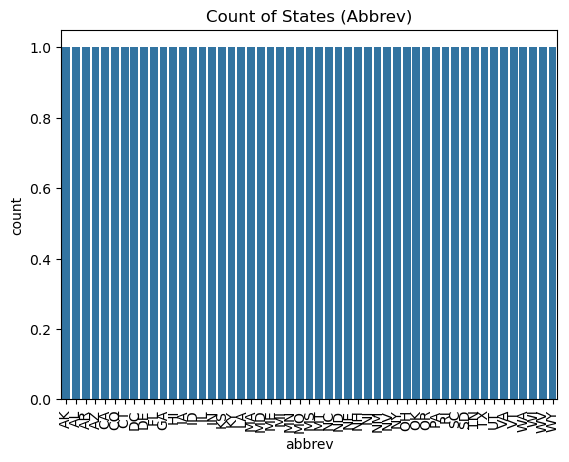

In [6]:
sns.countplot(x='abbrev', data=df)
plt.title("Count of States (Abbrev)")
plt.xticks(rotation=90)
plt.show()


In [13]:
# Automatically select only numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", num_cols)


Numeric columns: Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')


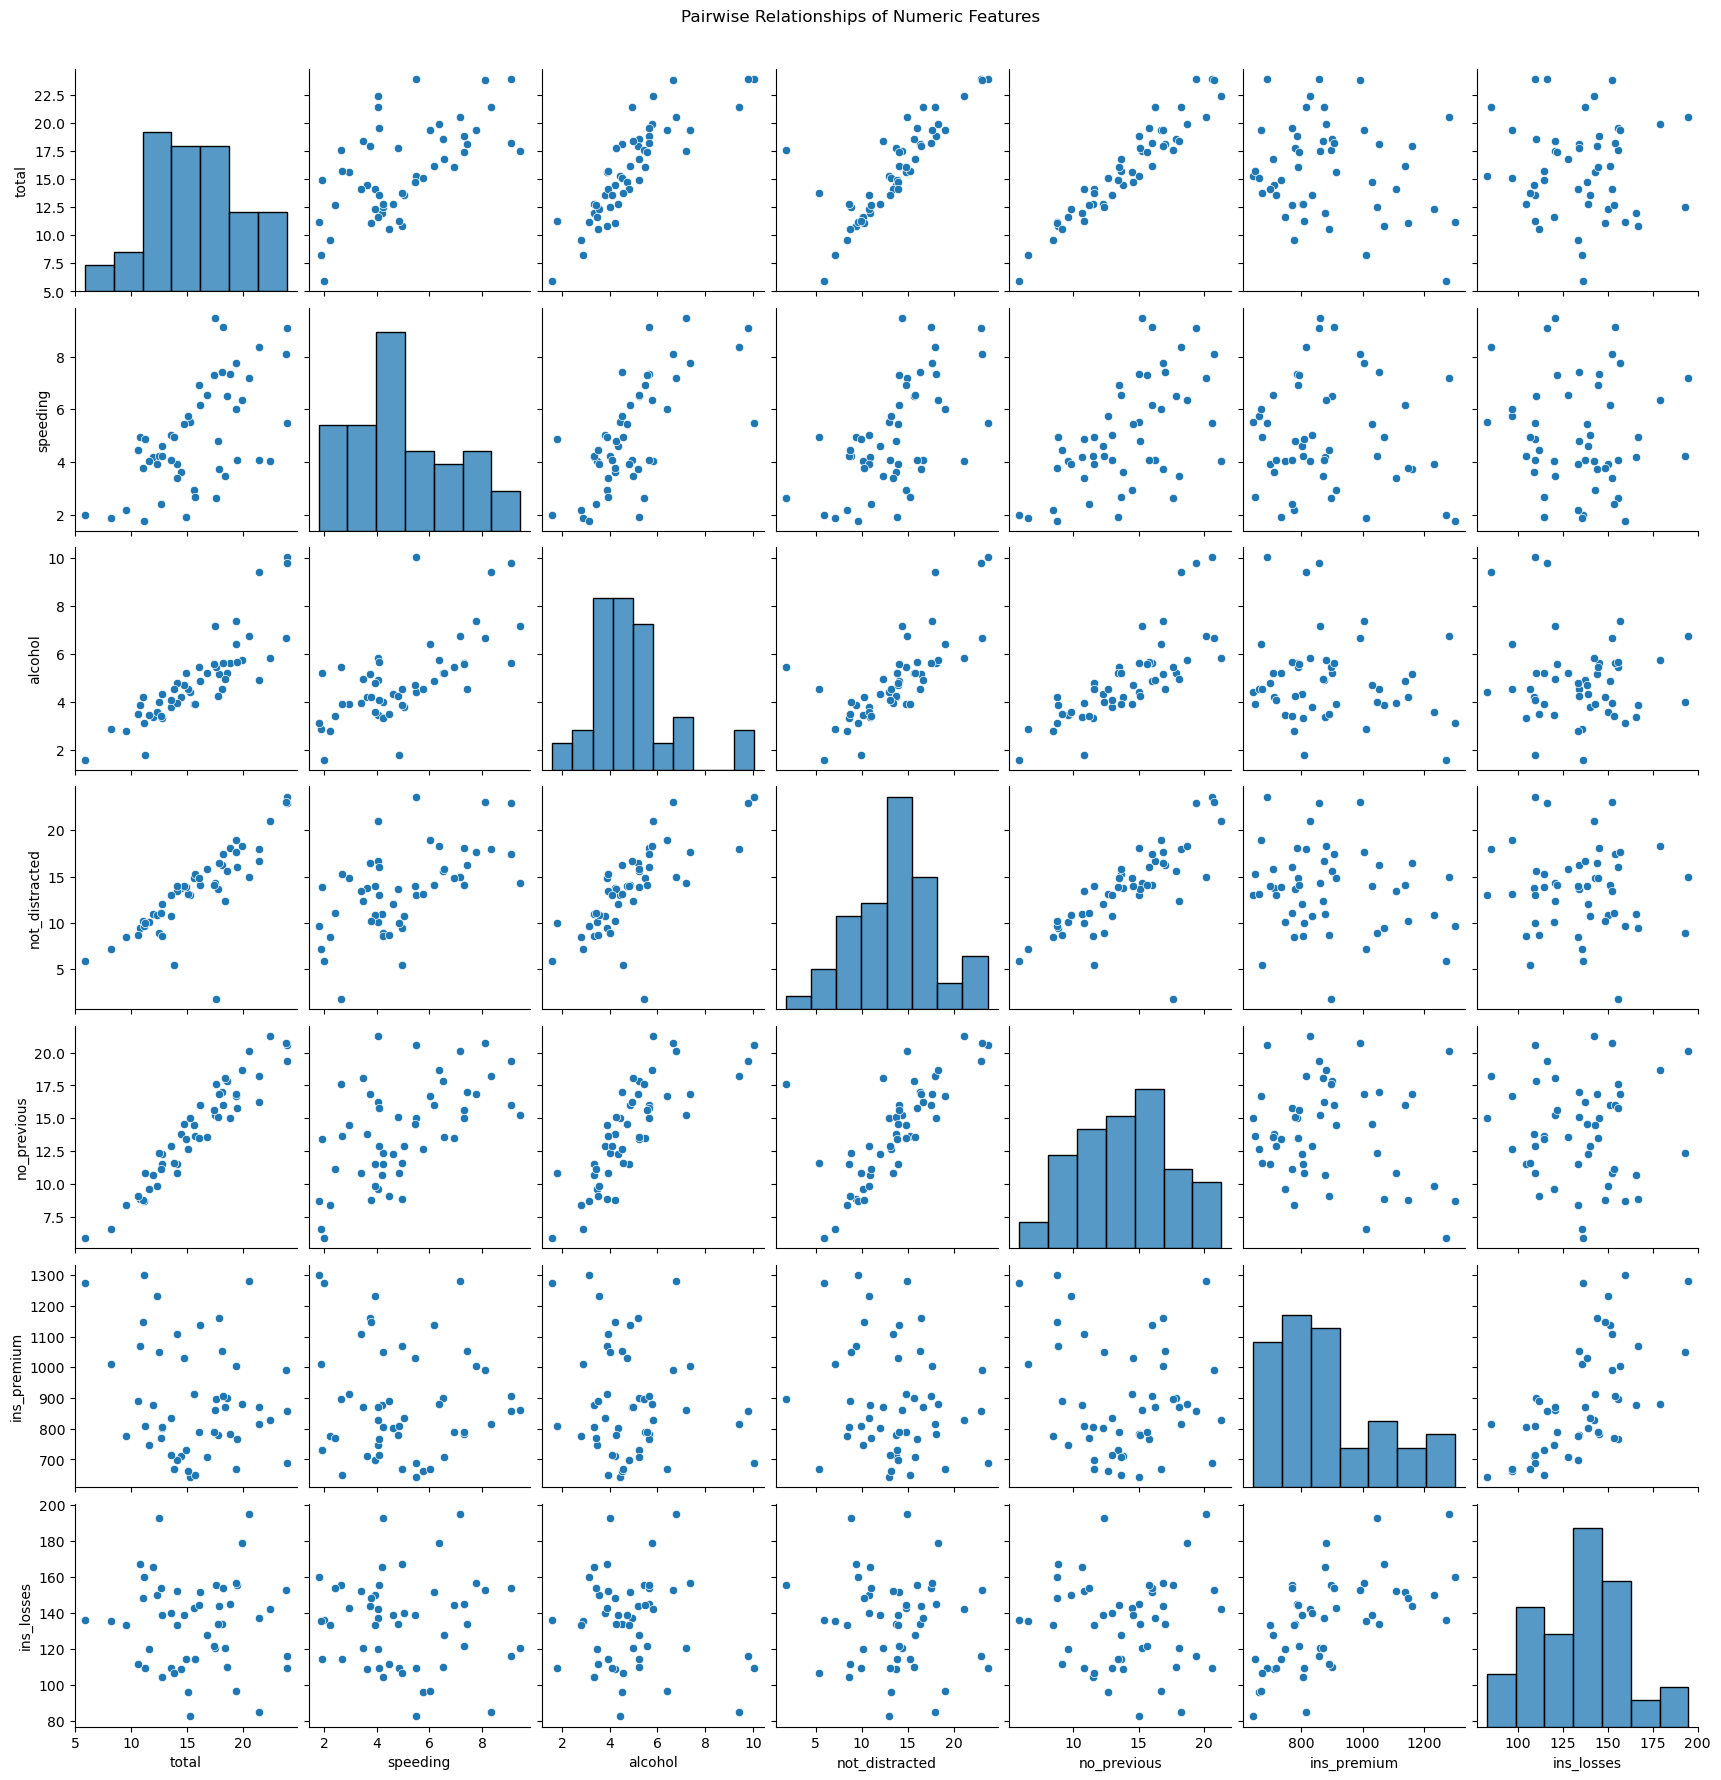

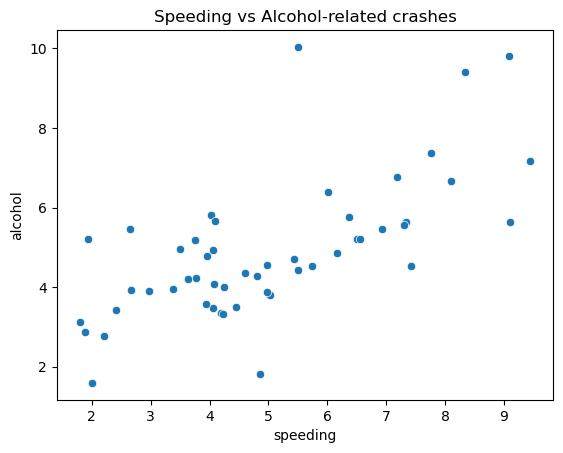

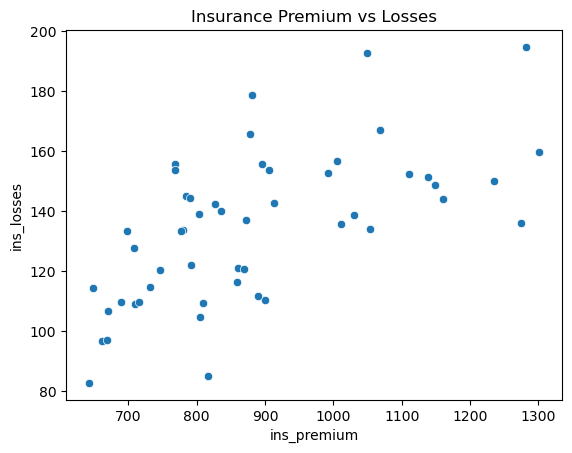

In [14]:
# Pairwise scatterplots
sns.pairplot(df[num_cols])
plt.suptitle("Pairwise Relationships of Numeric Features", y=1.02)
plt.show()

# Scatterplot examples
sns.scatterplot(x='speeding', y='alcohol', data=df)
plt.title("Speeding vs Alcohol-related crashes")
plt.show()

sns.scatterplot(x='ins_premium', y='ins_losses', data=df)
plt.title("Insurance Premium vs Losses")
plt.show()


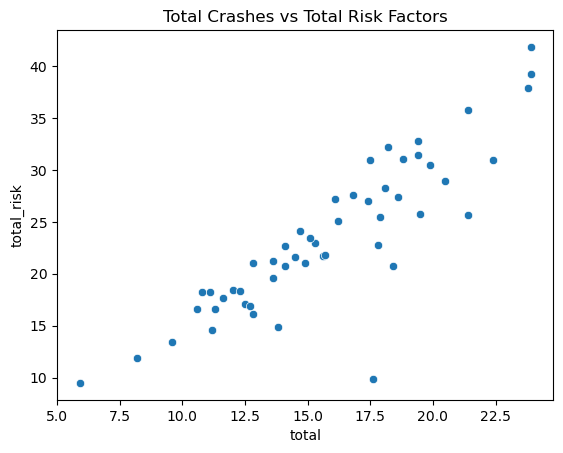

In [15]:
df['total_risk'] = df['speeding'] + df['alcohol'] + df['not_distracted']
sns.scatterplot(x='total', y='total_risk', data=df)
plt.title("Total Crashes vs Total Risk Factors")
plt.show()

In [16]:
df.to_csv("car_crashes_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as car_crashes_cleaned.csv")

✅ Cleaned dataset saved as car_crashes_cleaned.csv
